<a href="https://colab.research.google.com/github/dewchan01/cat_dog_classifier/blob/main/cat_and_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install modelbit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 14.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of types-requests to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of types-requests to determine which version is compatible with other requirements. This could take a while.
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully 

In [ ]:
import modelbit
mb = modelbit.login()

In [ ]:
#import os libs
import os
import shutil
import itertools
import pathlib
import glob
import random
from PIL import Image

#import Data handling
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay,accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#import Deep learning tools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , BatchNormalization , Dropout,Flatten , Activation
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers,optimizers
from tensorflow.keras import metrics
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

#Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
dir_path = "/content/drive/MyDrive/datasets/"

In [ ]:
train_cats_dir = dir_path + "train/cat"
valid_cats_dir = dir_path + "val/cat"
train_dogs_dir = dir_path + "train/dog"
valid_dogs_dir = dir_path + "val/dog"
test_dataset_dir = dir_path + "test"
train_count = 7500

In [ ]:
cat_dog = ['cat','dog']

working_dir = "sample_data"
train_dir = os.path.join(working_dir,'train')
test_dir = os.path.join(working_dir,'test')
val_dir = os.path.join(working_dir,'val')

files = [train_dir,test_dir,val_dir]

In [ ]:
for file_name in files:
    os.mkdir(file_name)
    for animal in cat_dog:
        os.mkdir(os.path.join(file_name,animal))

In [ ]:
fnames = os.listdir(train_cats_dir)
for fname in fnames[:train_count]:
  src = os.path.join(train_cats_dir , fname)
  dst = os.path.join(train_dir,'cat', fname)
  shutil.copyfile(src , dst)

for fname in fnames[train_count:]:
  src= os.path.join(train_cats_dir , fname)
  dst= os.path.join(test_dir ,"cat", fname)
  shutil.copyfile(src,dst)

fnames = os.listdir(train_dogs_dir)
for fname in fnames[:train_count]:
  src = os.path.join(train_dogs_dir , fname)
  dst = os.path.join(train_dir , "dog",fname)
  shutil.copyfile(src,dst)

for fname in fnames[train_count:]:
  src= os.path.join(train_dogs_dir, fname)
  dst = os.path.join(test_dir , "dog", fname)
  shutil.copyfile(src, dst)

fnames = os.listdir(valid_cats_dir)
for fname in fnames:
    src= os.path.join(valid_cats_dir, fname)
    dst = os.path.join(val_dir , "cat", fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(valid_dogs_dir)
for fname in fnames:
    src= os.path.join(valid_dogs_dir, fname)
    dst = os.path.join(val_dir , "dog", fname)
    shutil.copyfile(src, dst)


print(f'Total training cat images {len(os.listdir(os.path.join(train_dir, "cat")))}')
print(f'Total validation cat images {len(os.listdir(os.path.join(val_dir, "cat")))}')
print(f'Total test cat images {len(os.listdir(os.path.join(test_dir, "cat")))}')
print('\n')
print(f'Total training dog images {len(os.listdir(os.path.join(train_dir, "dog")))}')
print(f'Total validation dog images {len(os.listdir(os.path.join(val_dir, "dog")))}')
print(f'Total test dog images {len(os.listdir(os.path.join(test_dir, "dog")))}')

Total training cat images 7500
Total validation cat images 2500
Total test cat images 2500


Total training dog images 7500
Total validation dog images 2500
Total test dog images 2510


In [ ]:
class cfg:
    img_height = 224
    img_width = 224
    img_channel = 3
    img_size = (img_height, img_width)
    epochs = 10
    num_class = 2
    batch_size = 32

def seed_everything(seed: int):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [ ]:
img_size = (cfg.img_height , cfg.img_width)

tr_gen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2,
                                   height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_directory(train_dir , target_size = img_size , class_mode = 'binary' ,
                                       color_mode = 'rgb' , seed = 2023, shuffle = True , batch_size = cfg.batch_size)

valid_gen = ts_gen.flow_from_directory(val_dir , target_size = img_size , class_mode = 'binary' ,
                                       color_mode = 'rgb' , seed = 2023, shuffle = True , batch_size = cfg.batch_size)

test_gen = ts_gen.flow_from_directory(test_dir , target_size = img_size , class_mode = 'binary' ,
                                       color_mode = 'rgb' , shuffle = False , batch_size = cfg.batch_size)

Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 5010 images belonging to 2 classes.


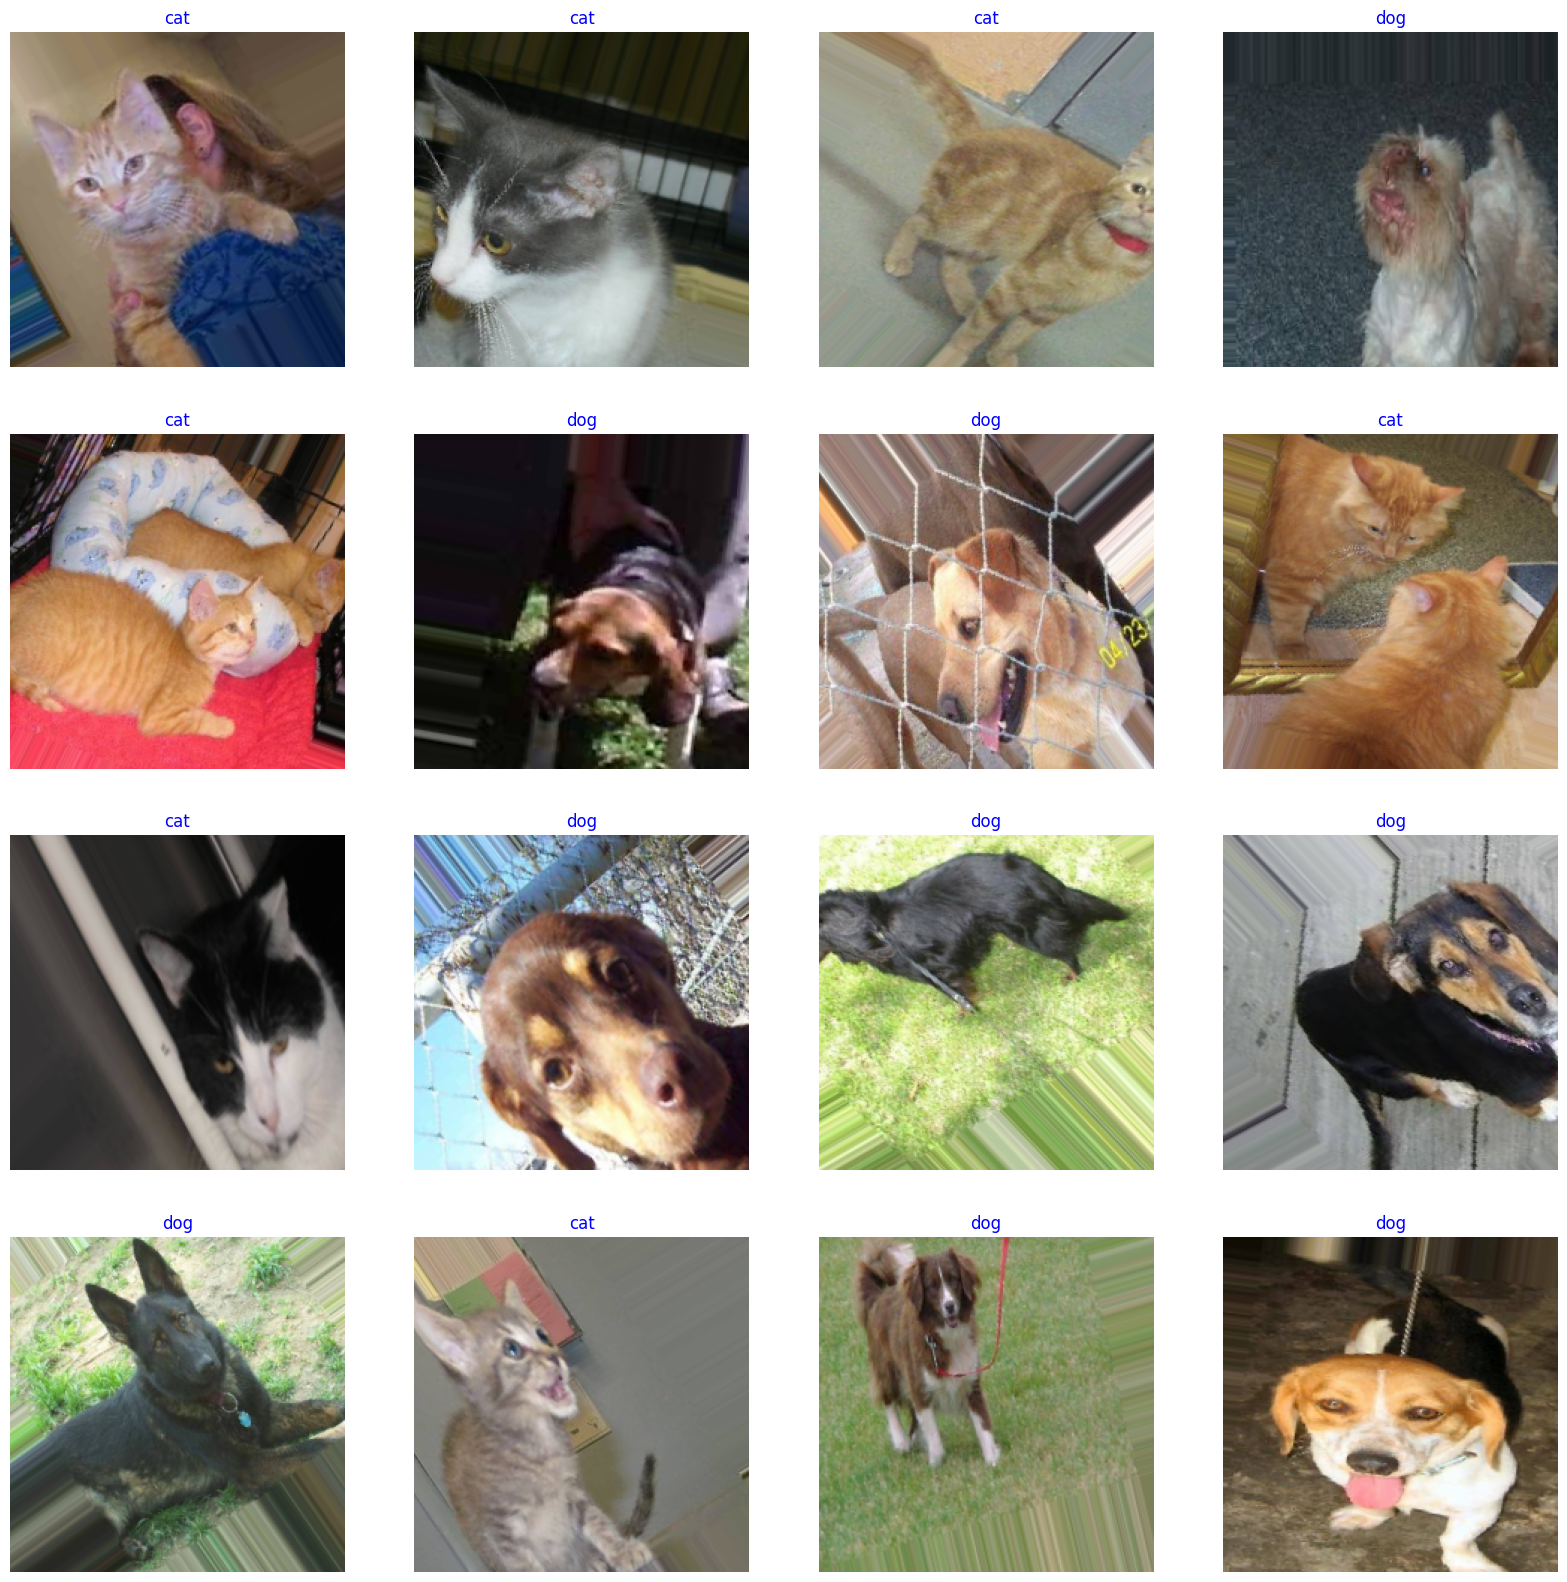

In [ ]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)
num_samples = len(images)

plt.figure(figsize=(20, 20))

for i in range(min(16, num_samples)):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    class_index = int(labels[i])
    class_name = classes[class_index]
    plt.title(class_name, color='blue', fontsize=12)
    plt.axis('off')
plt.show()

In [ ]:
img_shape = (cfg.img_height, cfg.img_width, cfg.img_channel)
base_model = tf.keras.applications.efficientnet.EfficientNetB5(include_top= False, weights= 'imagenet',
                                                               input_shape= img_shape, pooling= 'max')
base_model.trainable= False

num_classes = len(classes)

model = Sequential([
    base_model,
    BatchNormalization(axis = -1 , momentum = 0.99 , epsilon = 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),
         bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate = 0.4 , seed = 40),
    Dense(1 , activation= 'sigmoid' )
])
model.compile(Adamax(learning_rate = 0.001) , loss = 'binary_crossentropy' , metrics= ['accuracy'])
model.summary()

In [ ]:
history = model.fit(x= train_gen , validation_data= valid_gen , epochs= 10 , verbose = 1 , validation_steps = None , shuffle = False)

Epoch 1/10
469/469 [==============================] - 289s 565ms/step - loss: 2.5683 - accuracy: 0.9676 - val_loss: 0.7429 - val_accuracy: 0.9868
Epoch 2/10
469/469 [==============================] - 256s 545ms/step - loss: 0.4626 - accuracy: 0.9779 - val_loss: 0.2575 - val_accuracy: 0.9892
Epoch 3/10
469/469 [==============================] - 254s 541ms/step - loss: 0.2454 - accuracy: 0.9775 - val_loss: 0.1699 - val_accuracy: 0.9900
Epoch 4/10
469/469 [==============================] - 254s 542ms/step - loss: 0.1939 - accuracy: 0.9778 - val_loss: 0.1461 - val_accuracy: 0.9898
Epoch 5/10
469/469 [==============================] - 253s 539ms/step - loss: 0.1757 - accuracy: 0.9790 - val_loss: 0.1329 - val_accuracy: 0.9894
Epoch 6/10
469/469 [==============================] - 265s 565ms/step - loss: 0.1664 - accuracy: 0.9777 - val_loss: 0.1209 - val_accuracy: 0.9908
Epoch 7/10
469/469 [==============================] - 263s 560ms/step - loss: 0.1602 - accuracy: 0.9785 - val_loss: 0.1157 -

In [ ]:
model.save("/content/drive/MyDrive/cat_dog_classify_model")

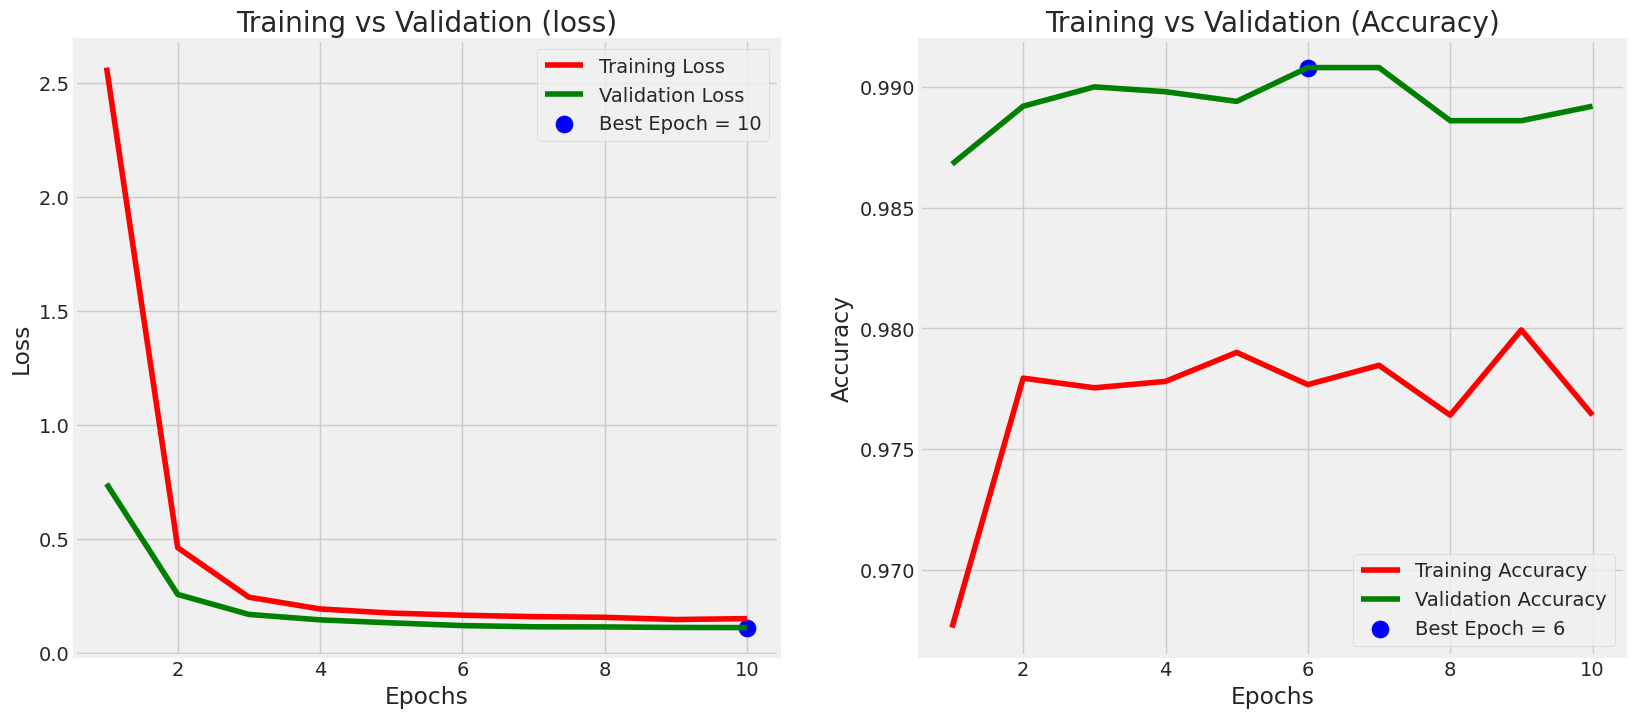

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r', label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss +1 , val_lowest , s = 150 , c = 'blue' , label = loss_label)
plt.title('Training vs Validation (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r', label= 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s= 150 , c = 'blue' , label= acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show();

In [ ]:
train_score = model.evaluate(train_gen , steps= 32 , verbose = 1)
val_score = model.evaluate(valid_gen , steps = 32 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 32 , verbose = 1)

print(f'\nTrain loss = {train_score[0] }')
print(f'Train Accuracy = {train_score[1]}')
print(f'\nValidation loss = {val_score[0]}')
print(f'Validation Accuracy = {val_score[1]}')
print(f'\nTest loss = {test_score[0]}')
print(f'Test Accuracy = {test_score[1]}')

32/32 [==============================] - 7s 205ms/step - loss: 0.1246 - accuracy: 0.9795

Train loss = 0.11662229150533676
Train Accuracy = 0.98828125

Validation loss = 0.11443937569856644
Validation Accuracy = 0.986328125

Test loss = 0.1245575025677681
Test Accuracy = 0.9794921875


In [ ]:
# Make predictions on the test set
preds = model.predict(test_gen)

# Convert the predictions to binary classes (0 or 1)
predicted_classes = (preds > 0.5).astype(int)

157/157 [==============================] - 37s 213ms/step


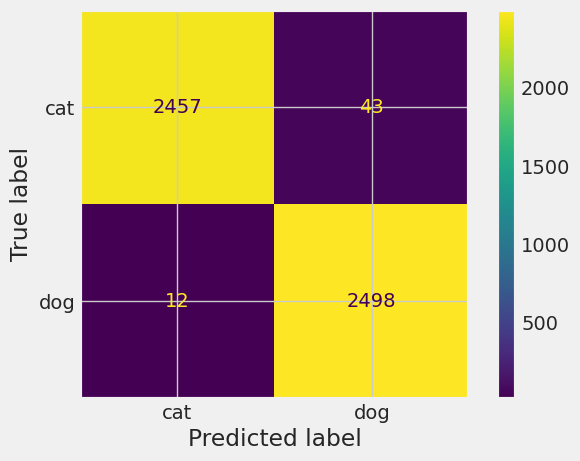

In [ ]:
# Get the true labels from the generator
true_classes = test_gen.classes

# Calculate the confusion matrix
confusion = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=test_gen.class_indices)
disp.plot(cmap='viridis', values_format='d')

In [ ]:
# Generate and print the classification report
classification_rep = classification_report(true_classes, predicted_classes, target_names=test_gen.class_indices)
print("\nClassification Report:")
print(classification_rep)



Classification Report:
              precision    recall  f1-score   support

         cat       1.00      0.98      0.99      2500
         dog       0.98      1.00      0.99      2510

    accuracy                           0.99      5010
   macro avg       0.99      0.99      0.99      5010
weighted avg       0.99      0.99      0.99      5010



In [ ]:
test_dir = "/content/drive/MyDrive/datasets/test"

images = os.listdir(test_dir)
results = []

for fname in images:
    image_path = os.path.join(test_dir, fname)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (cfg.img_height, cfg.img_width))
    predictions = model.predict(np.array([image]))
    predicted_classes = (predictions > 0.5).astype(int)[0][0]
    results.append({'Filename': fname, 'PredictedClass': predicted_classes})

df = pd.DataFrame(results)
df['Filename'] = df['Filename'].str.replace('.jpg', '')
transformed_df = pd.DataFrame({
    'id': df['Filename'].astype(int),
    'label': df['PredictedClass']
})

transformed_df = transformed_df.sort_values(by='id',ascending=True)

transformed_df.to_csv('efficientnet_submission.csv', index = False)

1/1 [==============================] - 0s 60ms/step


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
model.save()